#텍스트 분류(감성분류기)

In [ ]:
!pip install konlpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 42.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 50.4 MB/s eta 0:00:00


In [ ]:
import numpy as np
from konlpy.tag import Okt
from keras.preprocessing.text import Tokenizer
from sklearn.preprocessing import LabelEncoder
from keras.utils import pad_sequences
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import pandas as pd

In [ ]:
df=pd.read_table('steam.txt', names = ['y', 'x'])
df

,y,x
0,0,노래가 너무 적음
1,0,"돌겠네 진짜. 황숙아, 어크 공장 그만 돌려라. 죽는다."
2,1,막노동 체험판 막노동 하는사람인데 장비를 내가 사야돼 뭐지
3,1,차악!차악!!차악!!! 정말 이래서 왕국을 되찾을 수 있는거야??
4,1,시간 때우기에 좋음.. 도전과제는 50시간이면 다 깰 수 있어요
...,...,...
99995,0,한글화해주면 10개산다
99996,0,개쌉노잼 ㅋㅋ
99997,0,노잼이네요... 30분하고 지웠어요...
99998,1,야생을 사랑하는 사람들을 위한 짧지만 여운이 남는 이야기. 영어는 그리 어렵지 않습니다.


In [ ]:
df.dropna(axis = 0, inplace = True)
print(df.duplicated(subset = 'x').sum())
df.drop_duplicates(subset = 'x', inplace = True)
print(df.duplicated(subset = 'x').sum())

108
0


In [ ]:
df['x'] = df['x'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣 ]','')
df['x'] = df['x'].str.replace('^ +','')
df['x'] = df['x'].replace('',np.nan)
df = df.dropna()

<ipython-input-6-66e72ee8d37c>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['x'] = df['x'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣 ]','')
<ipython-input-6-66e72ee8d37c>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['x'] = df['x'].str.replace('^ +','')


In [ ]:
okt = Okt()
# 불용어 정의
s_w=set(['은','는','이','가','를','들','에게','의','도','을','으로','만','라서','하다'])
X_data=[]
for i in tqdm(df['x']):
  tk_d = okt.morphs(i)
  end_d = [w for w in tk_d if w not in s_w]
  X_data.append(' '.join(end_d))

100%|██████████| 99892/99892 [06:46<00:00, 245.79it/s]


In [ ]:
y_data = df.y.values

In [ ]:
len(X_data), len(y_data)

(99892, 99892)

In [ ]:
X,test_x,Y,test_y=train_test_split(X_data, y_data,test_size=0.3 ,random_state=42 ,stratify=y_data)
train_x,val_x,train_y,val_y=train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

In [ ]:
len(train_x),len(train_y),len(test_x),len(test_y),len(val_x),len(val_y)

(55939, 55939, 29968, 29968, 13985, 13985)

In [ ]:
tk = Tokenizer()
tk.fit_on_texts(train_x)

# 이미지 분류

In [ ]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, Embedding, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from keras.losses import binary_crossentropy
from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard
from keras.optimizers import RMSprop,Adam, SGD

In [ ]:
from keras.datasets import cifar10, cifar100
(x_data, y_data), (test_x, test_y) = cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [ ]:
np.unique(y_data)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
train_x, val_x, train_y, val_y = train_test_split(x_data, y_data, test_size = 0.2, stratify = y_data)

In [ ]:
train_x.shape, test_x.shape, val_x.shape, train_y.shape, test_y.shape, val_y.shape

((40000, 32, 32, 3),
 (10000, 32, 32, 3),
 (10000, 32, 32, 3),
 (40000, 1),
 (10000, 1),
 (10000, 1))

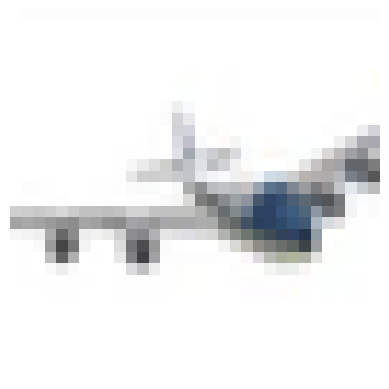

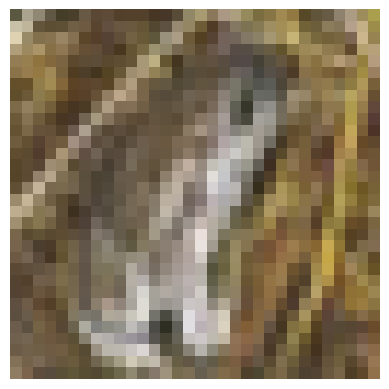

In [ ]:
import matplotlib.pyplot as plt
plt.axis('off')
plt.imshow(train_x[1])
plt.show()
plt.axis('off')
plt.imshow(train_x[2])
plt.show()

In [ ]:
from keras.utils import to_categorical
s_train_x = train_x / 255
s_test_x = test_x / 255
s_val_x = val_x / 255
s_train_y = to_categorical(train_y)
s_test_y = to_categorical(test_y)
s_val_y = to_categorical(val_y)
s_train_x.shape, s_test_x.shape, s_val_x.shape, s_train_y.shape, s_test_y.shape, s_val_y.shape

((40000, 32, 32, 3),
 (10000, 32, 32, 3),
 (10000, 32, 32, 3),
 (40000, 10),
 (10000, 10),
 (10000, 10))

In [ ]:
ck_m = ModelCheckpoint('img_m.h5', monitor = 'val_acc', save_best_only = True)
es = EarlyStopping(patience = 5, restore_best_weights = True)
tb = TensorBoard()

In [ ]:
# # 학습률 73

# m = Sequential()
# m.add(Conv2D(32, 3, padding = "same", input_shape = s_train_x.shape[1:]))
# m.add(BatchNormalization())
# m.add(Conv2D(32, 3, padding = "same"))
# m.add(BatchNormalization())
# m.add(MaxPooling2D((2)))
# m.add(Dropout(0.2))
# m.add(Conv2D(64, 3, padding = "same"))
# m.add(BatchNormalization())
# m.add(Conv2D(64, 3, padding = "same"))
# m.add(BatchNormalization())
# m.add(MaxPooling2D((2)))
# m.add(Dropout(0.3))
# m.add(Flatten())
# m.add(Dense(128, activation = 'relu'))
# m.add(Dropout(0.5))
# m.add(Dense(10, activation = 'softmax'))
# m.compile(optimizer = Adam(learning_rate = 0.001), loss = 'sparse_categorical_crossentropy', metrics = 'acc')
# m.summary()

# hy = m.fit(s_train_x, train_y, validation_data = (s_val_x, val_y), batch_size = 128, epochs = 50)

In [ ]:
# # 학습률 84

# m = Sequential()
# m.add(Conv2D(32, 3, activation = 'relu', padding = "same", input_shape = s_train_x.shape[1:]))
# m.add(Conv2D(32, 3, activation = 'relu', padding = "same"))
# m.add(BatchNormalization())
# m.add(MaxPooling2D((2)))
# m.add(Dropout(0.25))

# m.add(Conv2D(64, 3, activation = 'relu', padding = "same"))
# m.add(Conv2D(64, 3, activation = 'relu', padding = "same"))
# m.add(BatchNormalization())
# m.add(MaxPooling2D((2)))
# m.add(Dropout(0.4))

# m.add(Conv2D(128, 3, activation = 'relu', padding = "same"))
# m.add(Conv2D(128, 3, activation = 'relu', padding = "same"))
# m.add(BatchNormalization())
# m.add(MaxPooling2D((2)))
# m.add(Dropout(0.5))

# m.add(Flatten())
# m.add(Dense(128, activation = 'relu'))
# m.add(Dense(64, activation = 'relu'))
# m.add(BatchNormalization())
# m.add(Dropout(0.5))
# m.add(Dense(10, activation = 'softmax'))
# m.compile(optimizer = Adam(learning_rate = 0.001), loss = 'sparse_categorical_crossentropy', metrics = 'acc')
# m.summary()

# hy = m.fit(s_train_x, train_y, validation_data = (s_val_x, val_y), batch_size = 128, epochs = 50)

In [ ]:
# 학습률 84

m = Sequential()
m.add(Conv2D(32, 3, activation = 'relu', padding = "same", input_shape = s_train_x.shape[1:]))
m.add(Conv2D(32, 3, activation = 'relu', padding = "same"))
m.add(BatchNormalization())
m.add(MaxPooling2D((2)))
m.add(Dropout(0.25))

m.add(Conv2D(64, 3, activation = 'relu', padding = "same"))
m.add(Conv2D(64, 3, activation = 'relu', padding = "same"))
m.add(BatchNormalization())
m.add(MaxPooling2D((2)))
m.add(Dropout(0.4))

m.add(Conv2D(128, 3, activation = 'relu', padding = "same"))
m.add(Conv2D(128, 3, activation = 'relu', padding = "same"))
m.add(BatchNormalization())
m.add(MaxPooling2D((2)))
m.add(Dropout(0.5))

m.add(Flatten())
m.add(Dense(512, activation = 'relu'))
m.add(BatchNormalization())
m.add(Dropout(0.5))
m.add(Dense(10, activation = 'softmax'))
m.compile(optimizer = Adam(learning_rate = 0.001), loss = 'sparse_categorical_crossentropy', metrics = 'acc')
m.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_50 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_51 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_24 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 dropout_33 (Dropout)        (None, 16, 16, 32)        0         
                                                                 
 conv2d_52 (Conv2D)          (None, 16, 16, 64)      

In [ ]:
hy = m.fit(s_train_x, train_y, validation_data = (s_val_x, val_y), batch_size = 128, epochs = 50)

Epoch 1/50
313/313 [==============================] - 8s 22ms/step - loss: 2.0202 - acc: 0.3507 - val_loss: 4.7366 - val_acc: 0.1160
Epoch 2/50
313/313 [==============================] - 6s 19ms/step - loss: 1.4152 - acc: 0.4920 - val_loss: 1.6945 - val_acc: 0.4545
Epoch 3/50
313/313 [==============================] - 6s 19ms/step - loss: 1.1726 - acc: 0.5785 - val_loss: 1.0870 - val_acc: 0.6192
Epoch 4/50
313/313 [==============================] - 6s 19ms/step - loss: 1.0336 - acc: 0.6319 - val_loss: 1.2490 - val_acc: 0.5706
Epoch 5/50
313/313 [==============================] - 6s 19ms/step - loss: 0.9316 - acc: 0.6692 - val_loss: 0.9053 - val_acc: 0.6821
Epoch 6/50
313/313 [==============================] - 6s 19ms/step - loss: 0.8548 - acc: 0.6974 - val_loss: 0.8477 - val_acc: 0.7022
Epoch 7/50
313/313 [==============================] - 6s 19ms/step - loss: 0.7894 - acc: 0.7196 - val_loss: 0.9839 - val_acc: 0.6779
Epoch 8/50
313/313 [==============================] - 6s 18ms/step - 

In [ ]:
print(m.evaluate(s_test_x, test_y)[1])

313/313 [==============================] - 1s 4ms/step - loss: 0.4984 - acc: 0.8489
0.8489000201225281


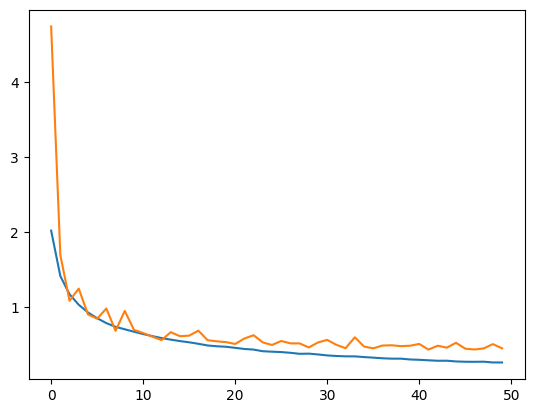

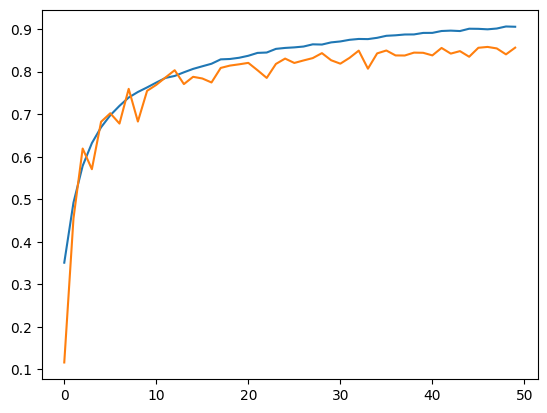

In [ ]:
plt.plot(hy.history['loss'])
plt.plot(hy.history['val_loss'])
plt.show()
plt.plot(hy.history['acc'])
plt.plot(hy.history['val_acc'])
plt.show()

딥러닝 데이터 문제 해결

In [1]:
import numpy as np
import pandas as pd

In [2]:
df1 = pd.read_csv("data1.csv")
df2 = pd.read_csv("data2.csv")

FileNotFoundError: ignored

In [3]:
df1.info()

NameError: ignored

In [6]:
np.unique(df1.Outcome, return_counts = True)

(array([0, 1]), array([424, 228]))

In [8]:
X = df1.drop(['ID', 'Outcome'], axis = 1).values
y = df1['Outcome'].values

In [9]:
from sklearn.model_selection import train_test_split
x_data, test_x, y_data, test_y = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)
train_x, val_x, train_y, val_y = train_test_split(x_data, y_data, test_size = 0.2, random_state = 42, stratify = y_data)

In [10]:
train_x.shape, test_x.shape, val_x.shape, train_y.shape, test_y.shape, val_y.shape

((364, 8), (196, 8), (92, 8), (364,), (196,), (92,))

In [4]:
from keras.datasets import cifar10
(train_x, train_y), (test_x, test_y) = cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


In [3]:
from keras.applications import VGG16, VGG19
m = VGG16()
m.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [7]:
from keras.layers import Input, Conv2D, MaxPooling2D, Dropout, BatchNormalization, Flatten, Dense
from keras.models import Sequential, Model

In [11]:
train_x.shape

(50000, 32, 32, 3)

In [15]:
m1 = VGG16(include_top = False, input_shape = train_x.shape[1:])
m1.summary()

58889256/58889256 [==============================] - 1s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                              

In [25]:
input = Input(shape = train_x.shape[1:])
cv1 = Conv2D(6, 3, activation = 'relu')(input)
mxp1 = MaxPooling2D(2)(cv1)
fl = Flatten()(mxp1)
d = Dense(10, activation = 'softmax')(fl)
m = Model(inputs = input, outputs = d)
m.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 30, 30, 6)         168       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 15, 15, 6)        0         
 2D)                                                             
                                                                 
 flatten_5 (Flatten)         (None, 1350)              0         
                                                                 
 dense_5 (Dense)             (None, 10)                13510     
                                                                 
Total params: 13,678
Trainable params: 13,678
Non-trainable params: 0
_______________________________________________________

In [21]:
input = Input(shape = train_x.shape[1:])
m1 = VGG16(include_top = False, input_tensor = input)
mm = m1.output
mm = Flatten()(mm)
mm = Dense(10, activation = 'softmax')(mm)
m = Model(inputs = m1.input, outputs = mm)
m.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0   

In [5]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, Embedding, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from keras.losses import binary_crossentropy
from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard
from keras.optimizers import RMSprop,Adam, SGD

In [8]:
input = Input(shape = (32,32,3))
cv1 = Conv2D(64, 3, activation = 'relu', padding = 'same')(input)
cv2 = Conv2D(64, 3, activation = 'relu', padding = 'same')(cv1)
mxp1 = MaxPooling2D(2)(cv2)

cv3 = Conv2D(128, 3, activation = 'relu', padding = 'same')(mxp1)
cv4 = Conv2D(128, 3, activation = 'relu', padding = 'same')(cv3)
mxp2 = MaxPooling2D(2)(cv4)

cv5 = Conv2D(256, 3, activation = 'relu', padding = 'same')(mxp2)
cv6 = Conv2D(256, 3, activation = 'relu', padding = 'same')(cv5)
cv7 = Conv2D(256, 3, activation = 'relu', padding = 'same')(cv6)
mxp3 = MaxPooling2D(2)(cv7)

cv8 = Conv2D(512, 3, activation = 'relu', padding = 'same')(mxp3)
cv9 = Conv2D(512, 3, activation = 'relu', padding = 'same')(cv8)
cv10 = Conv2D(512, 3, activation = 'relu', padding = 'same')(cv9)
mxp4 = MaxPooling2D(2)(cv10)

cv11 = Conv2D(512, 3, activation = 'relu', padding = 'same')(mxp4)
cv12 = Conv2D(512, 3, activation = 'relu', padding = 'same')(cv11)
cv13 = Conv2D(512, 3, activation = 'relu', padding = 'same')(cv12)
mxp5 = MaxPooling2D(2)(cv13)

fl = Flatten()(mxp5)
d = Dense(10, activation = 'softmax')(fl)
m = Model(inputs = input, outputs = d)
m.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 128)       147584    
                                                             

In [11]:
m.compile(optimizer = Adam(learning_rate = 0.001), loss = 'sparse_categorical_crossentropy', metrics = 'acc')
hy = m.fit(train_x, train_y, validation_split = 0.2, batch_size = 64, epochs = 30)

Epoch 1/30
625/625 [==============================] - 26s 39ms/step - loss: 0.2780 - acc: 0.9124 - val_loss: 0.2733 - val_acc: 0.9089
Epoch 2/30
625/625 [==============================] - 22s 36ms/step - loss: 0.2943 - acc: 0.9074 - val_loss: 0.2998 - val_acc: 0.9063
Epoch 3/30
625/625 [==============================] - 24s 38ms/step - loss: 0.1877 - acc: 0.9408 - val_loss: 0.3043 - val_acc: 0.9053
Epoch 4/30
625/625 [==============================] - 23s 38ms/step - loss: 0.2000 - acc: 0.9379 - val_loss: 0.3782 - val_acc: 0.8839
Epoch 5/30
625/625 [==============================] - 23s 36ms/step - loss: 0.1744 - acc: 0.9469 - val_loss: 0.3593 - val_acc: 0.8912
Epoch 6/30
625/625 [==============================] - 22s 36ms/step - loss: 0.1937 - acc: 0.9410 - val_loss: 0.4202 - val_acc: 0.8841
Epoch 7/30
625/625 [==============================] - 24s 38ms/step - loss: 0.2056 - acc: 0.9384 - val_loss: 0.4401 - val_acc: 0.8752
Epoch 8/30
625/625 [==============================] - 23s 37ms

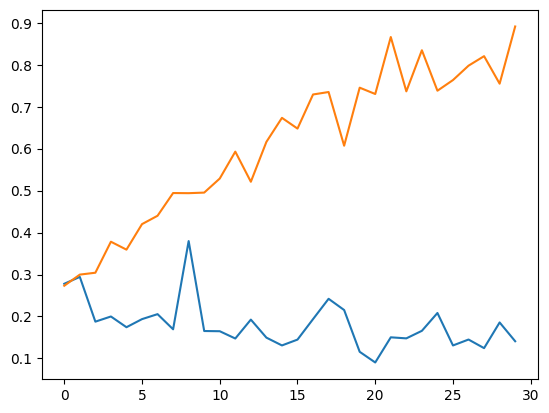

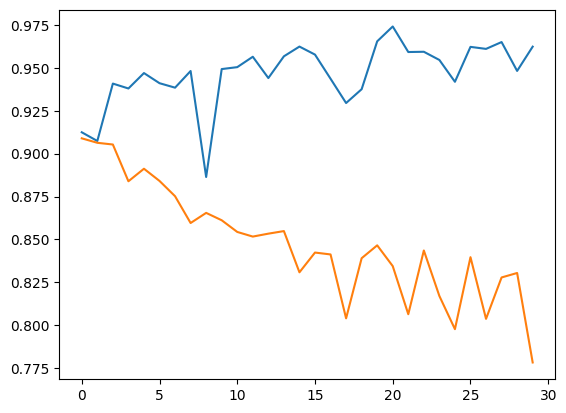

In [12]:
import matplotlib.pyplot as plt
plt.plot(hy.history['loss'])
plt.plot(hy.history['val_loss'])
plt.show()
plt.plot(hy.history['acc'])
plt.plot(hy.history['val_acc'])
plt.show()